使用wildreceipt发票数据集，调用mmocr的KIE预训练模型，进行KIE关键信息抽取。

同济子豪兄 2022-1-6

# 切换工作目录到主目录

In [1]:
import os
os.chdir('../')
os.listdir()

['.git',
 '.circleci',
 '.codespellrc',
 '.coveragerc',
 '.github',
 '.gitignore',
 '.pre-commit-config.yaml',
 '.pylintrc',
 '.readthedocs.yml',
 'CITATION.cff',
 'LICENSE',
 'MANIFEST.in',
 'README.md',
 'README_zh-CN.md',
 'configs',
 'demo',
 'docker',
 'docs',
 'mmocr',
 'model-index.yml',
 'requirements.txt',
 'requirements',
 'resources',
 'setup.cfg',
 'setup.py',
 'tests',
 'tools',
 '__MACOSX',
 '.eggs',
 'outputs',
 'tutorials',
 '.ipynb_checkpoints',
 'dict_printed_chinese_english_digits.txt',
 'font.TTF',
 'dict_printed_chinese_english_digits.txt.1',
 'out-test2.mp4']

# 导入工具包

In [2]:
# 导入opencv-python
import cv2

# 导入可视化工具包matplotlib，并让绘制的图像嵌入在notebook中
import matplotlib.pyplot as plt
%matplotlib inline

# 定义可视化图像函数
def look_img_path(img_path):
    '''opencv读入图像，matplotlib可视化格式为RGB，因此需将BGR转RGB，最后可视化出来'''
    img = cv2.imread(img_path)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()
    
# 定义可视化图像函数
def look_img(img):
    '''输入array，matplotlib可视化格式为RGB，因此需将BGR转RGB，最后可视化出来'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 下载发票数据集

In [3]:
# 创建data文件夹
!mkdir data

# 下载发票数据集
!wget https://download.openmmlab.com/mmocr/data/wildreceipt.tar

# 解压发票数据集
!tar -xf wildreceipt.tar 

# 讲发票数据集移动到data文件夹中
!mv wildreceipt ./data

--2022-01-06 17:05:48--  https://download.openmmlab.com/mmocr/data/wildreceipt.tar
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 185323520 (177M) [application/octet-stream]
Saving to: ‘wildreceipt.tar’

wildreceipt.tar     100%[===================>] 176.74M   105MB/s    in 1.7s    

2022-01-06 17:05:50 (105 MB/s) - ‘wildreceipt.tar’ saved [185323520/185323520]



# 使用预训练KIE模型

In [9]:
import mmocr
from mmocr.utils.ocr import MMOCR

In [5]:
mmocr = MMOCR(det='TextSnake', recog='SAR', kie='SDMGR',device='cpu')

load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth
load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth
load checkpoint from http path: https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt_20210520-7489e6de.pth


/home/featurize/work/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '
Downloading: "https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt_20210520-7489e6de.pth" to /home/featurize/.cache/torch/hub/checkpoints/sdmgr_unet16_60e_wildreceipt_20210520-7489e6de.pth


  0%|          | 0.00/18.4M [00:00<?, ?B/s]

In [6]:
result = mmocr.readtext('demo/demo_kie.jpeg', output='outputs/demo_kie_pred.jpg')

/environment/miniconda3/lib/python3.7/site-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/home/featurize/work/mmocr/mmocr/models/textdet/postprocess/utils.py:51: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  canvas = canvas[1:h + 1, 1:w + 1].astype(np.bool)
/home/featurize/work/mmocr/mmocr/datasets/kie_dataset.py:46: UserWarning: KIEDataset is only initialized as a downstream demo task of text detection and recognition without an annotation fi

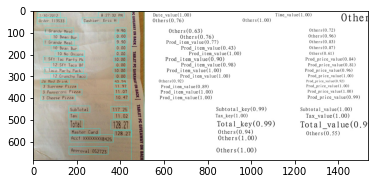

In [7]:
look_img_path('outputs/demo_kie_pred.jpg')

# 在测试集上评估预训练KIE模型性能

选择Visual + Textual多模态测试集，并使用Macro F1指标来评估

In [28]:
!python tools/test.py configs/kie/sdmgr/sdmgr_unet16_60e_wildreceipt.py https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt_20210405-16a47642.pth --eval macro_f1

load checkpoint from http path: https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt_20210405-16a47642.pth
Downloading: "https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt_20210405-16a47642.pth" to /home/featurize/.cache/torch/hub/checkpoints/sdmgr_unet16_60e_wildreceipt_20210405-16a47642.pth
100%|██████████████████████████████████████| 18.4M/18.4M [00:00<00:00, 63.4MB/s]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 472/472, 25.6 task/s, elapsed: 18s, ETA:     0s{'macro_f1': 0.8763246}
